# Latent Consistency Models

[paper](https://arxiv.org/abs/2310.04378)  
[GitHub](https://github.com/luosiallen/latent-consistency-model)  
[Gugging Face Space](https://huggingface.co/spaces/SimianLuo/Latent_Consistency_Model)

In [ ]:
!pip install torch
!pip install --upgrade diffusers transformers accelerate scipy ftfy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.6 MB/s eta 0:00:00


In [ ]:
#@title choose model (モデル選択) モデルを変更する場合はこれ以降を実行

import torch
import random
from IPython.display import display
from diffusers import DiffusionPipeline
from PIL import Image
from PIL.PngImagePlugin import PngInfo
import numpy as np
import time

device = "cuda"
# Load the cd_imagenet64_l2 checkpoint.

#@markdown モデル選択
model_name = "SimianLuo/LCM_Dreamshaper_v7" #@param ["SimianLuo/LCM_Dreamshaper_v7"] {allow-input: false}

pipe = DiffusionPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7", custom_pipeline="latent_consistency_txt2img", custom_revision="main")

# To save GPU memory, torch.float16 can be used, but it may compromise image quality.
pipe.to(torch_device="cuda", torch_dtype=torch.float32)

cnt = 0

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:659: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:659: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Generate LCM_0008.png in 2.6172983646392822 sec


  0%|          | 0/8 [00:00<?, ?it/s]

Generate LCM_0009.png in 2.588747262954712 sec


  0%|          | 0/8 [00:00<?, ?it/s]

Generate LCM_0010.png in 2.6112985610961914 sec


  0%|          | 0/8 [00:00<?, ?it/s]

Generate LCM_0011.png in 2.6013519763946533 sec
Total generate in 10.418696165084839 sec


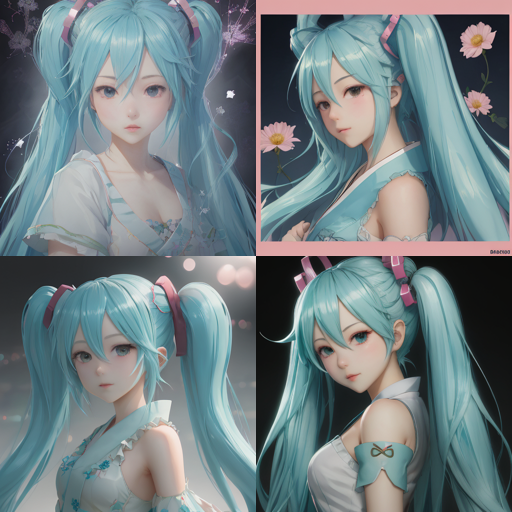

In [ ]:
#@title  画像生成

#@markdown Prompt
prompt = "a girl,Hatsunemiku,japanese anime style, 8k" #@param{type:"string"}

# Can be set to 1~50 steps. LCM support fast inference even <= 4 steps. Recommend: 1~8 steps.
#@markdown num_inference_steps (ステップ数)
num_inference_steps = 8 #@param{type:"number"}

#@markdown guidance_scale (CFG スケール)
guidance_scale = 8.0 #@param{type:"number"}

#@markdown width(横幅)
width = 512 #@param{type:"number"}

#@markdown height(高さ)
height = 512 #@param{type:"number"}

#@markdown lcm_origin_steps(いじらなくていい)
lcm_origin_steps = 50 #@param{type:"number"}


#@markdown 生成枚数 (平方数が好ましい)
num_gen_img = "4" #@param[1,4,9,16,25,36,49]

import os

# ディレクトリのパスを定義
dir_path = '/content/LCM_imgs'

# ディレクトリが存在しない場合、新しく作成
if not os.path.exists(dir_path):
    os.mkdir(dir_path)

# ディレクトリ内のファイル数をカウント
file_count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])


num_gen_img = int(num_gen_img)


# seed = random.randint(0, 999999) if seed < 0 else seed
# generator = torch.Generator(device="cuda").manual_seed(seed)
# print(seed)

image_list = []
time_list = []
#make_image_tile
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w,h=w//2,h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid



for i in range(num_gen_img):
  start = time.time()

  gen_image = pipe(prompt=prompt,width = width , height = height , num_inference_steps=num_inference_steps, guidance_scale=guidance_scale, lcm_origin_steps=lcm_origin_steps, output_type="pil" ,).images[0]

  end = time.time()
  time_per_img  = end - start

  if num_gen_img != 1:
    print("Generate LCM_{:04}.png".format(i+file_count) + " in " + str(time_per_img) + " sec")
  time_list.append(time_per_img)

  #save
  gen_image.save(os.path.join(dir_path,"LCM_{:04}.png".format(i+file_count)))
  image_list.append(gen_image)


grid = image_grid(image_list, rows=int(np.sqrt(num_gen_img)), cols=int(np.sqrt(num_gen_img)))

print("Total generate in "+ str(sum(time_list)) +" sec")

grid

2023/10/19 init

[Twitter](https://twitter.com/hanyingcl) latextex